In [3]:
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt

In [4]:
# a)
B = np.array([[4,-2],[-2,4]])
a = np.array([[0],[1]])
b = np.array([[-2],[1]])

# solutions:
C = B - np.identity(2)
c = -0.5*np.linalg.inv(C)@(a-b)
c0 = -c.T@C@c

# testing:
# x = np.array([[0],[0]])
sq_forms = []
for i in range(-50,50):
    for j in range(-50,50):
        x = np.array([[i/10],[j/10]])
        f_form = x.T@B@x - x.T@x + a.T@x - b.T@x
        sq_form = (x-c).T@C@(x-c)+c0
        sq_forms.append((i/10,j/10,sq_form.copy()))
#         print(i,j,f_form-sq_form<0.0000001)
min(sq_forms, key = lambda x: x[-1])

(-0.6, -0.4, array([[-0.6]]))

In [6]:
def f1(x):
    x = x.reshape(2,1)
    return x.T@B@x - x.T@x + a.T@x - b.T@x

def f2(x):
    x = x.reshape(2,1)
    return np.cos((x-b).T@(x-b)) + (x-a).T@B@(x-a)

def f3(x):
    x = x.reshape(2,1)
    t1 = -np.exp(-(x-a).T@(x-a))
    t2 = -np.exp(-(x-b).T@B@(x-b))
    t3 = 0.1*np.log(det(0.01*np.eye(len(x))+x@x.T))
    f = 1 + t1 + t2 + t3
    return f

In [5]:
# c)
def grad_f1(x):
    x = x.reshape(2,1)
    return 2*(x-c).T@C

def grad_f2(x):
    x = x.reshape(2,1)
    return -2*np.sin((x-b).T@(x-b))*(x-b).T + 2*(x-a).T@B

def grad_f3(x):
    x = x.reshape(2,1)
    t1 = -np.exp(-(x-c).T@(x-a))*(-2*(x-a).T)
    t2 = -np.exp(-(x-b).T@B@(x-b))*(-2*(x-b).T)
    t3 = (0.1*2/(x[0][0]**2 + x[1][0]**2 + 0.01))*x.T
    grad = t1 + t2 + t3
    return grad

x = np.array([0.3,0]) 
grad_f1(x)

array([[ 3.8, -1.2]])

In [6]:
def grad_checker(f, grad_f, x, h):
        approx_J = np.array([(f(x + h*np.eye(2)[:,j])-f(x))/h for j in [0,1]]).reshape(2,)
        return ((grad_f(x) - approx_J)/grad_f(x)) < 0.01#, grad_f(x)[0], approx_J

x = np.array([1,1])
h = 0.000000001
for i in range(-10,10):
    for j in range(-10,10):
        x = np.array([i,j])
        print(grad_checker(f3, grad_f3, x, h))

[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True False]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True False]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True False]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[ True  True]]
[[False  True]]
[[ True  True]]
[[ True 

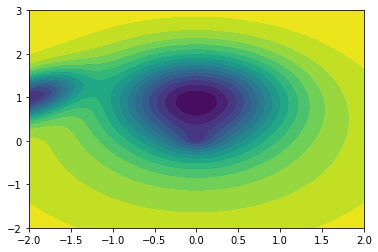

In [21]:
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,3,100)
mx1, mx2 = np.meshgrid(x1, x2)
f = np.array([f3(np.array([x1, x2])) for x1,x2 in zip(mx1.ravel(), mx2.ravel())]).reshape(mx1.shape[0],mx1.shape[1])
plt.contourf(x1, x2, f, levels=20)
plt.show()

In [7]:
x1 = np.array([[0.],[0.05]])
x2 = np.array([[0.],[0.15]])
f3(x1), f3(x2)

(array([[-0.30427419]]), array([[-0.28870543]]))